In [1]:
from fastai.vision import *

In [43]:
from pathlib import Path
path = Path('/home/ec2-user/SageMaker/train')
path

PosixPath('/home/ec2-user/SageMaker/train')

In [3]:
tfms = get_transforms(do_flip = True, max_rotate = 10, max_zoom = 1, max_lighting = 0.2, max_warp = None)

In [8]:
data = (ImageList.from_folder(path ) #Donde encontrar la data? -> en "path" y sus carpetas
        .split_by_rand_pct(valid_pct=0.3)  #Como dividir la data entrenamiento/evaluacion? -> 30% valid , 70% training
        .label_from_folder()            #Como etiquetar? -> Dependiendo de los nombres de las carpetas
        .transform(tfms , size=256)     #Data augmentation? -> Usar tfms con un tamaño de imagen 256
        .databunch(bs = 16)) #batch size 16

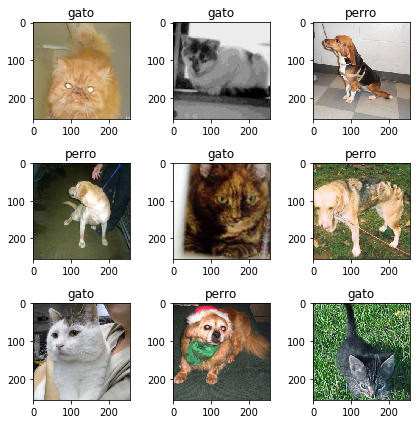

In [9]:
data.show_batch(3, figsize=(6,6), hide_axis=False)

In [10]:
data.classes

['gato', 'perro']

In [11]:
data

ImageDataBunch;

Train: LabelList (1400 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
gato,gato,gato,gato,gato
Path: /home/ec2-user/SageMaker/train;

Valid: LabelList (600 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
perro,gato,perro,perro,perro
Path: /home/ec2-user/SageMaker/train;

Test: None

In [19]:
learn = cnn_learner(data, models.resnet34, metrics=[error_rate , accuracy])

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.222285,0.095331,0.023333,0.976667,19:38


In [20]:
learn.lr_find(1e-4, 1e-1)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


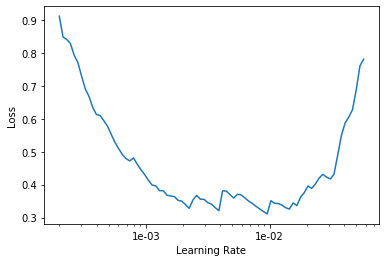

In [21]:
learn.recorder.plot()

In [22]:
epochs = 1
learning_rate = 1e-3
learn.fit_one_cycle(epochs, max_lr = learning_rate)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.230965,0.074253,0.030000,0.970000,21:53


In [23]:
learn.export('model.pkl')

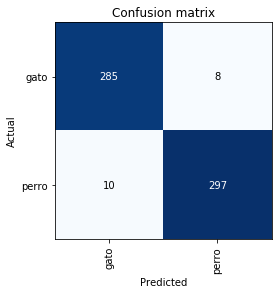

In [24]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [59]:
pathTest = Path('/home/ec2-user/SageMaker/test')
test = ImageList.from_folder(pathTest)

In [45]:
data = (ImageList.from_folder(path ) 
        .split_by_rand_pct(valid_pct=0.3)  
        .label_from_folder() 
        .add_test_folder(pathTest)
        .transform(tfms = None , size=256)
        .databunch(bs = 6))

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.

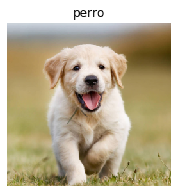

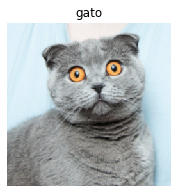

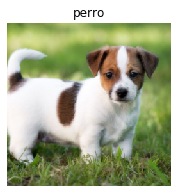

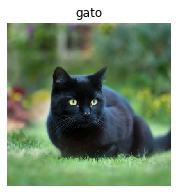

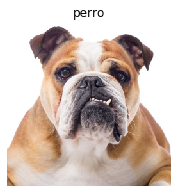

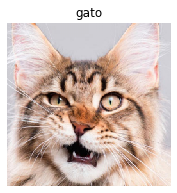

In [69]:
for i in range(6):
    img = data.test_ds[i][0]
    y = learn.predict(img)
    img.show(title = str(y[0]))